In [73]:
import pandas as pd
import numpy as np
#import seaborn as sb
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [74]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv";


df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [75]:
df = df.drop(["Holdeplass_Fra", "Holdeplass_Til","Linjetype","Linjefylke","Område","Fylke","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra", "Linjeretning", "Kommune", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra", "TurId", "Kjøretøy_Kapasitet"], axis=1)

In [76]:
df.head(20)

,Dato,Linjenavn,Passasjerer_Ombord
0,10/08/2020,150,5
1,15/08/2020,150,5
2,03/08/2020,150,6
3,27/07/2020,150,10
4,27/08/2020,150,10
5,01/08/2020,31,8
6,28/07/2020,150,1
7,27/07/2020,150,-1
8,16/08/2020,150,2
9,13/08/2020,150,4


In [77]:
for index, row in df.iterrows():
    row['Passasjerer_Ombord'] = pd.to_numeric(row['Passasjerer_Ombord'])
    
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index, 'Passasjerer_Ombord'] = row['Passasjerer_Ombord']*-1

In [78]:
df = df.loc[df['Linjenavn'] == "150"]

In [79]:
df['Dato'] = pd.to_datetime(df['Dato'], errors="ignore", dayfirst="true" )
df = df.sort_values(by="Dato")
df.head(20)

,Dato,Linjenavn,Passasjerer_Ombord
4330,2020-07-09,150,0
1778,2020-07-11,150,2
1765,2020-07-12,150,6
1186,2020-07-12,150,3
2137,2020-07-16,150,2
3799,2020-07-16,150,10
4158,2020-07-17,150,5
4671,2020-07-17,150,2
14,2020-07-17,150,9
3115,2020-07-20,150,7


In [80]:
df = df.groupby('Dato')['Passasjerer_Ombord'].sum().reset_index()

In [81]:
df['Dag'] = df['Dato'].dt.dayofweek
df.head(20)

,Dato,Passasjerer_Ombord,Dag
0,2020-07-09,0,3
1,2020-07-11,2,5
2,2020-07-12,9,6
3,2020-07-16,12,3
4,2020-07-17,16,4
5,2020-07-20,12,0
6,2020-07-21,17,1
7,2020-07-22,22,2
8,2020-07-23,22,3
9,2020-07-25,1,5


In [82]:
corrMatrix = df.corr(method='pearson')
corrMatrix.style.background_gradient(cmap='coolwarm')

,Passasjerer_Ombord,Dag
Passasjerer_Ombord,1.000000,-0.254884
Dag,-0.254884,1.000000


<AxesSubplot:xlabel='Dag', ylabel='Passasjerer_Ombord'>

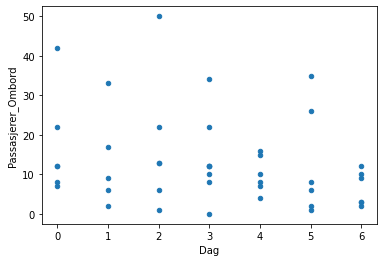

In [83]:
df.plot.scatter(x = 'Dag', y = 'Passasjerer_Ombord')

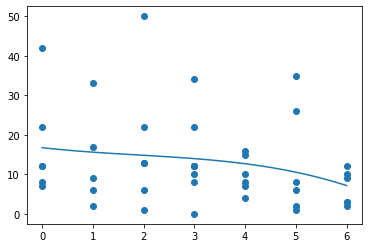

In [84]:
# Previous travels - just to see how it was loooking in the past
x = df["Dag"]
y = df["Passasjerer_Ombord"]

poly_reg_model = np.poly1d(np.polyfit(x, y, 3))

poly_reg_line = np.linspace(0, 6, 100)

plt.scatter(x, y)
plt.plot(poly_reg_line, poly_reg_model(poly_reg_line))
plt.show()

In [85]:
# train the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=46)


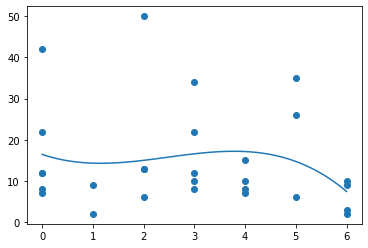

In [89]:
# test on the training data 
poly_reg_model = np.poly1d(np.polyfit(X_train, y_train, 3))

poly_reg_line = np.linspace(0, 6, 100)

plt.scatter(X_train, y_train)
plt.plot(poly_reg_line, poly_reg_model(poly_reg_line))
plt.show()


In [90]:
#since we use polynomial regression we need to find the R-squared to find the prediction 
print(r2_score(y, poly_reg_model(x)))

#This means that the polynomial regression only fits our case about 1-2%
# this means its not really the best fit but that might be because the dataset is too small to be able to create and predict the values we want 

0.018168040334621938


In [93]:
# Lets predict the number of passengers on a monday

monday_pass = poly_reg_model(0)
print(monday_pass)

16.453265980209533
